# AIGER Circuits


## From String


In [1]:
from ml2.aiger import AIGERCircuit

INFO:datasets:PyTorch version 2.5.1 available.
INFO:datasets:TensorFlow version 2.14.0 available.


In [2]:
# Note the special order of inputs, ands, latches, and outputs
circuit_str = "2\n4\n6\n8\n10\n17 11 15\n10 11\n0\n0\n1\n0\n16"

In [3]:
circuit = AIGERCircuit.from_str_without_header(
    circuit=circuit_str,
    num_inputs=5,
    num_outputs=5,
    components=["header", "inputs", "ands", "latches", "outputs"],
)

In [4]:
circuit.to_str()

'aag 8 5 1 5 1\n2\n4\n6\n8\n10\n10 11\n0\n0\n1\n0\n16\n17 11 15'

In [5]:
circuit_str = "2\n4\n6\n8\n10\n12 7\n0\n0\n1\n0\n16\n14 9 6\n16 14 12\ni0 i0\ni1 i1\ni2 i2\ni3 i3\ni4 i4\nl0 l0\no0 o0\no1 o1\no2 o2\no3 o3\no4 o4"

In [6]:
circuit = AIGERCircuit.from_str_without_header(circuit=circuit_str, num_inputs=5, num_outputs=5)

In [7]:
circuit.to_str()

'aag 8 5 1 5 2\n2\n4\n6\n8\n10\n12 7\n0\n0\n1\n0\n16\n14 9 6\n16 14 12\ni0 i0\ni1 i1\ni2 i2\ni3 i3\ni4 i4\nl0 l0\no0 o0\no1 o1\no2 o2\no3 o3\no4 o4'

## From CSV Fields


In [8]:
circuit = AIGERCircuit.from_csv_fields(
    {
        "circuit": "aag 9 5 1 5 3\n2\n4\n6\n8\n10\n12 18\n1\n1\n1\n0\n16\n14 13 5\n16 15 6\n18 15 7\ni0 i0\ni1 i1\ni2 i2\ni3 i3\ni4 i4\nl0 l0\no0 o0\no1 o1\no2 o2\no3 o3\no4 o4"
    }
)

In [9]:
circuit.header.max_var_id

9

In [10]:
circuit.num_ands

3

## Display


INFO:ml2.tools.grpc_service:ABCAiger container magical_kapitsa on port 50051 started
INFO:ml2.tools.grpc_service:Successfully connected to ABCAiger gRPC server on port 50051


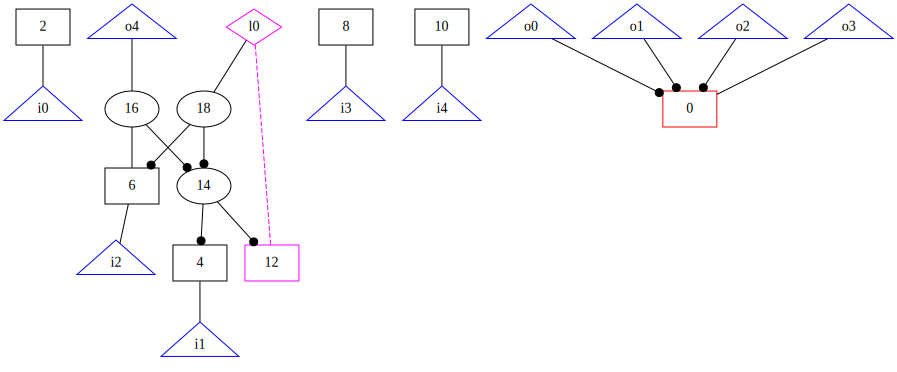

INFO:ml2.tools.grpc_service:Stopped and removed container magical_kapitsa running ABCAiger on port 50051


In [11]:
from ml2.tools.abc_aiger import ABCAiger

tool = ABCAiger()

tool.display_aiger(circuit, {"TIMEOUT": 10})

del tool

## Simplify


INFO:ml2.tools.grpc_service:ABCAiger container relaxed_lederberg on port 50052 started
INFO:ml2.tools.grpc_service:Successfully connected to ABCAiger gRPC server on port 50052


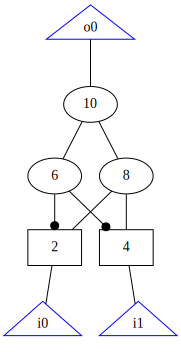

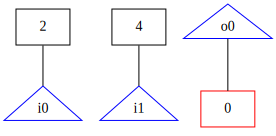

In [ ]:
from ml2.tools.abc_aiger import ABCAiger

tool = ABCAiger()

circuit = AIGERCircuit.from_str(
    "aag 5 2 0 1 3\n2\n4\n10\n6 5 3\n8 4 2\n10 8 6\ni0 i0\ni1 i1\no0 o0"
)

circuits, _, _, _ = tool.aiger_simplify(circuit, {"TIMEOUT": 10})

tool.display_aiger(circuit, {"TIMEOUT": 10})
tool.display_aiger(circuits[-1], {"TIMEOUT": 10})

del tool

## AIGER to Sequence Tokenizer


In [ ]:
from ml2.aiger import AIGERToSeqTokenizer
from ml2.tokenizers.vocabulary import Vocabulary

In [ ]:
token_to_id = {
    "<p>": 0,
    "0": 1,
    "1": 2,
    "2": 3,
    "3": 4,
    "4": 5,
    "5": 6,
    "6": 7,
    "7": 8,
    "8": 9,
    "9": 10,
    "10": 11,
    "11": 12,
    "12": 13,
    "13": 14,
    "14": 15,
    "15": 16,
    "16": 17,
    "17": 18,
    "18": 19,
    "19": 20,
    "20": 21,
    "21": 22,
    "22": 23,
    "23": 24,
    "24": 25,
    "25": 26,
    "26": 27,
    "27": 28,
    "28": 29,
    "29": 30,
    "30": 31,
    "31": 32,
    "32": 33,
    "33": 34,
    "34": 35,
    "35": 36,
    "36": 37,
    "37": 38,
    "38": 39,
    "39": 40,
    "40": 41,
    "<s>": 42,
    "<e>": 43,
    "<c>": 44,
    "<l>": 45,
    "<n>": 46,
    "<r>": 47,
    "<u>": 48,
}

In [ ]:
vocab = Vocabulary(token_to_id)

In [ ]:
tokenizer = AIGERToSeqTokenizer(
    start=True,
    eos=True,
    pad=128,
    components=["header", "inputs", "latches", "outputs", "ands"],
    inputs=["i0", "i1", "i2", "i3", "i4"],
    outputs=["o0", "o1", "o2", "o3", "o4"],
    unfold_negations=False,
    unfold_latches=False,
    vocabulary=vocab,
)

In [ ]:
circuit = AIGERCircuit.from_str(
    "aag 19 5 3 5 11\n2\n4\n6\n8\n10\n12 30\n14 35\n16 39\n26\n0\n0\n0\n0\n18 17 9\n20 13 5\n22 20 15\n24 23 13\n26 24 19\n28 19 14\n30 28 20\n32 16 14\n34 33 25\n36 19 13\n38 37 33\ni0 i0\ni1 i1\ni2 i2\ni3 i3\ni4 i4\nl0 l0\nl1 l1\nl2 l2\no0 o0\no1 o1\no2 o2\no3 o3\no4 o4"
)

In [ ]:
encoding = tokenizer.encode(circuit)

In [ ]:
%pprint
encoding.tokens

In [ ]:
encoding.ids